In [2]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from keras.preprocessing import sequence

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
num_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)
print(X_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 

In [6]:
print(X_train.shape)

(25000,)


In [7]:
max_kelime = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_kelime)
X_test = sequence.pad_sequences(X_test, maxlen = max_kelime)
print("Eğitim kümesinin son hali : \n", X_train)

Eğitim kümesinin son hali : 
 [[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


In [8]:
print(X_train.shape)

(25000, 500)


In [9]:
#Keras modelimizi oluşturalım

In [11]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(num_words, embedding_vector_length))
model.add(LSTM(64))
model.add(Dense(1, activation = 'sigmoid'))

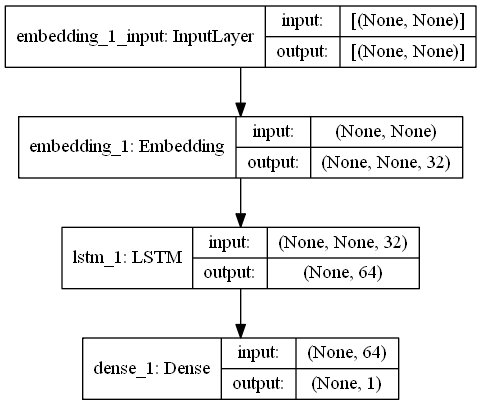

In [14]:
import tensorflow as tf
tf.keras.utils.plot_model(model, "VBU-Group3-LSTM.png", show_shapes = True, show_layer_names = True)

In [15]:
#Modeli derleme

In [17]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [18]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 184,897
Trainable params: 184,897
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size = 512,
    validation_split = 0.2
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 298s 15ms/sample - loss: 0.6554 - acc: 0.6394 - val_loss: 0.5064 - val_acc: 0.7688
Epoch 2/10
20000/20000 [==============================] - 404s 20ms/sample - loss: 0.4380 - acc: 0.8099 - val_loss: 0.3597 - val_acc: 0.8500
Epoch 3/10
20000/20000 [==============================] - 531s 27ms/sample - loss: 0.2845 - acc: 0.8889 - val_loss: 0.3251 - val_acc: 0.8608
Epoch 4/10
20000/20000 [==============================] - 619s 31ms/sample - loss: 0.2406 - acc: 0.9079 - val_loss: 0.3130 - val_acc: 0.8724
Epoch 5/10
20000/20000 [==============================] - 671s 34ms/sample - loss: 0.2072 - acc: 0.9263 - val_loss: 0.2900 - val_acc: 0.8828
Epoch 6/10
20000/20000 [==============================] - 632s 32ms/sample - loss: 0.1810 - acc: 0.9369 - val_loss: 0.3407 - val_acc: 0.8510
Epoch 7/10
20000/20000 [==============================] - 680s 34ms/sample - loss: 0.3697 - acc: 0.8413 -

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history["acc"], '--')
plt.plot(history.history["val_acc"])
plt.title("Model Performansı")
plt.ylabel("Başarım")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = 'lower right')
plt.show()

In [ ]:
plt.plot(history.history["loss"], '--')
plt.plot(history.history["val_loss"])
plt.title("Model Hatası")
plt.ylabel("Hata")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "upper right")
plt.show()

In [ ]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin Başarımı : %.2f%%" % (performans[1]*100))

In [ ]:
#Derin Otokodlayıcılar (Autoencoders) ile Anomali Tespiti 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model